In [709]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [790]:
df = pd.read_csv('births_toy.csv')
col_dict = pd.read_excel('column_dictionary.xlsx', header=None)

In [791]:
df.shape

(1000, 56)

In [792]:
df.head()

,Unnamed: 0,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,...,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN
0,1,1,1,26.6,0,2570,12,2017,2.0,9,...,0,0,1,110,1,2,N,0,M,64
1,2,1,1,24.1,0,3410,8,2017,1.0,5,...,0,0,1,224,1,2,N,0,M,45
2,3,1,1,28.8,0,2041,6,2018,2.0,7,...,0,0,0,153,1,1,N,0,F,36
3,4,1,1,31.6,0,4054,8,2018,2.0,1,...,0,1,0,155,1,2,N,0,M,0
4,5,1,1,34.4,0,3850,4,2017,1.0,5,...,0,2,0,106,1,1,N,0,F,25


In [793]:
df = df.drop(['Unnamed: 0'], axis=1)

In [794]:
col_dict.head()

,0,1
0,ATTEND,birth_attendant
1,BFACIL,birth_place
2,BMI,bmi
3,CIG_0,cigs_before_preg
4,DBWT,birthweight_g


In [795]:
df.columns = col_dict[1]
df.columns = map(str.lower, df.columns)
df.head()

,birth_attendant,birth_place,bmi,cigs_before_preg,birthweight_g,last_norm_menses_mn,last_norm_menses_yr,marital_stat,birth_mn,birth_time,...,prior_births_now_dead,prior_births_now_living,prior_other_terminations,prepregnancy_weight_r,delivery_method_r,res_status,prev_cesarean,num_prev_cesareans,infant_sex,weight_gain
0,1,1,26.6,0,2570,12,2017,2.0,9,1426,...,0,0,1,110,1,2,N,0,M,64
1,1,1,24.1,0,3410,8,2017,1.0,5,915,...,0,0,1,224,1,2,N,0,M,45
2,1,1,28.8,0,2041,6,2018,2.0,7,636,...,0,0,0,153,1,1,N,0,F,36
3,1,1,31.6,0,4054,8,2018,2.0,1,642,...,0,1,0,155,1,2,N,0,M,0
4,1,1,34.4,0,3850,4,2017,1.0,5,2301,...,0,2,0,106,1,1,N,0,F,25


In [796]:
df.describe()

,birth_attendant,birth_place,bmi,cigs_before_preg,birthweight_g,last_norm_menses_mn,last_norm_menses_yr,marital_stat,birth_mn,birth_time,...,mn_prenatalcare_began,num_prenatal_visits,prior_births_now_dead,prior_births_now_living,prior_other_terminations,prepregnancy_weight_r,delivery_method_r,res_status,num_prev_cesareans,weight_gain
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,872.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,1.298000,1.052000,28.845600,1.663000,3253.897000,9.582000,2256.671000,1.407110,6.211000,1229.50900,...,5.233000,13.331000,0.513000,1.446000,1.237000,178.508000,1.797000,1.355000,0.39500,31.88000
std,0.753501,0.411662,12.622755,8.429857,604.435574,16.602618,1362.271459,0.491578,3.453463,628.79395,...,14.792685,13.791797,6.987178,6.314662,8.830108,129.781166,1.148525,0.545227,4.45183,18.99696
min,1.000000,1.000000,15.300000,0.000000,540.000000,1.000000,2016.000000,1.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000,1.000000,1.000000,0.00000,0.00000
25%,1.000000,1.000000,22.300000,0.000000,2973.750000,4.000000,2017.000000,1.000000,3.000000,802.75000,...,2.000000,9.000000,0.000000,0.000000,0.000000,130.000000,1.000000,1.000000,0.00000,20.00000
50%,1.000000,1.000000,25.800000,0.000000,3290.000000,7.000000,2017.000000,1.000000,6.000000,1231.00000,...,3.000000,12.000000,0.000000,1.000000,0.000000,150.000000,1.000000,1.000000,0.00000,29.50000
75%,1.000000,1.000000,31.225000,0.000000,3610.750000,10.000000,2017.000000,2.000000,9.000000,1721.25000,...,3.000000,14.000000,0.000000,2.000000,1.000000,185.000000,3.000000,2.000000,0.00000,40.00000
max,5.000000,7.000000,99.900000,99.000000,5240.000000,99.000000,9999.000000,2.000000,12.000000,2359.00000,...,99.000000,99.000000,99.000000,99.000000,99.000000,999.000000,5.000000,4.000000,99.00000,99.00000


In [803]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
birth_attendant             1000 non-null int64
birth_place                 1000 non-null int64
bmi                         978 non-null float64
cigs_before_preg            1000 non-null int64
birthweight_g               1000 non-null int64
last_norm_menses_mn         1000 non-null int64
last_norm_menses_yr         1000 non-null int64
marital_stat                872 non-null float64
birth_mn                    1000 non-null int64
birth_time                  1000 non-null int64
birth_dy                    1000 non-null int64
m_deliveryweight            1000 non-null int64
f_combined_age              1000 non-null int64
f_education                 851 non-null float64
f_hispanic_origin           856 non-null float64
f_race_r15                  1000 non-null int64
f_race_r31                  1000 non-null int64
f_race_r6                   818 non-null float64
last_live_birth_mn       

In [798]:
df = df.drop(['birth_yr', 
              'last_other_preg_mn', 
              'sex_imp', 'm_age_imp', 
              'm_marital_stat_imp', 
              'm_race_imp'], axis=1)

In [799]:
def replace_na(data, column_name, value):
    data[column_name] = data[column_name].mask(data[column_name] == value, np.nan)

In [801]:
replace_na(df, 'bmi', 99.9)

In [804]:
columns_9 = ['f_education','f_hispanic_origin','f_race_r6','m_education','m_hispanic_origin','no_infec_reported',
             'no_m_morbidity_reported','no_riskf_reported','payment_source']
              
for i in columns_9:
    replace_na(df, i, 9)

KeyError: 'payment_source'

In [775]:
columns_99 = ['cigs_before_preg','f_combined_age','f_race_r15','f_race_r31','m_height_in']

for i in columns_99:
    replace_na(df, i, 99)

In [776]:
columns_888 = ['last_preg_mn','last_live_birth_mn']

for i in columns_888:
    replace_na(df, i, 888)

In [777]:
columns_999 = ['last_live_birth_mn','last_preg_mn','m_deliveryweight']

for i in columns_999:
    replace_na(df, i, 999)

In [778]:
columns_9999 = ['last_norm_menses_yr']

for i in columns_9999:
    replace_na(df, i, 9999)

In [779]:
columns_U = ['gonorrhea','admit_icu','m_transferred']

In [787]:
col_dict.iloc[41]

0                PAY
1    payment_source 
Name: 41, dtype: object

In [788]:
sum(df['payment_source'] == 9)

KeyError: 'payment_source'

In [693]:
sum(pd.isnull(df['m_race_imp']))

942

In [701]:
df['m_transferred'].value_counts()

N    995
Y      5
Name: m_transferred, dtype: int64

C:\Users\catri\Anaconda\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\catri\Anaconda\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


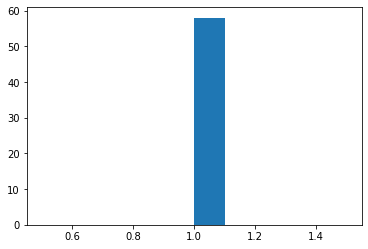

In [695]:
plt.hist(df['m_race_imp'])
plt.show()

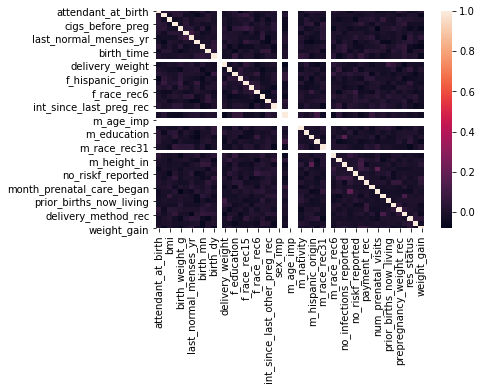

In [108]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

In [109]:
df.columns.get_loc("birth_weight_g")

4

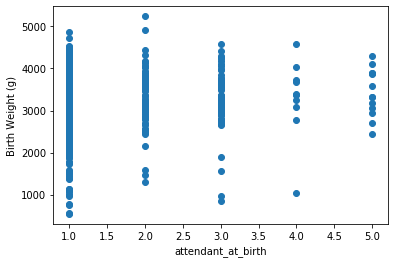

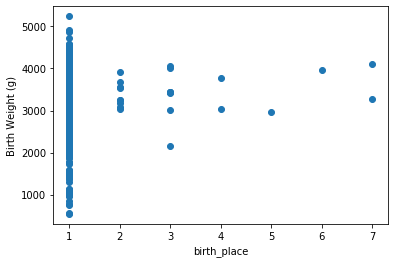

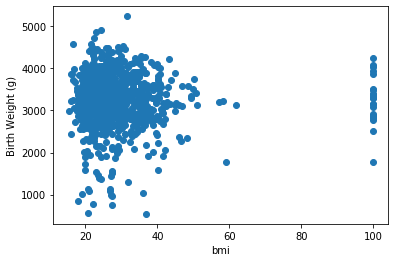

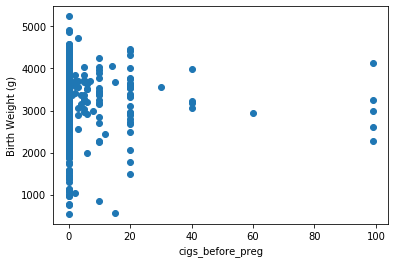

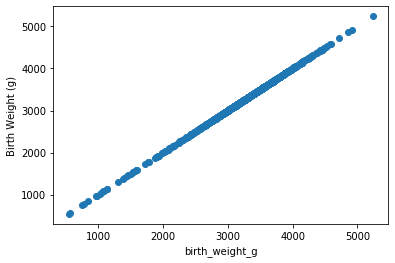

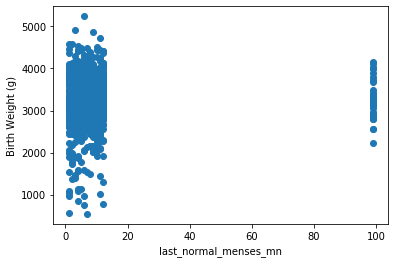

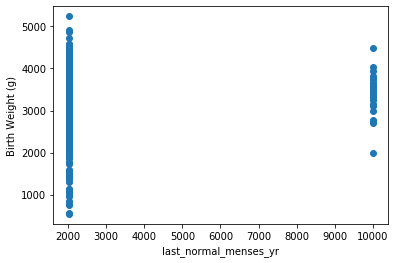

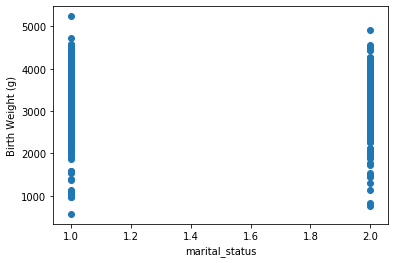

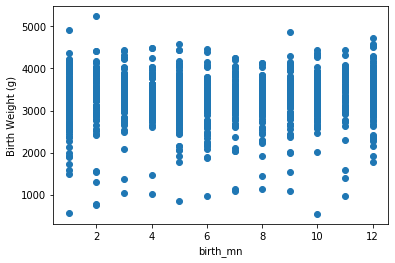

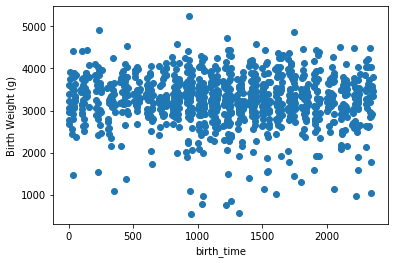

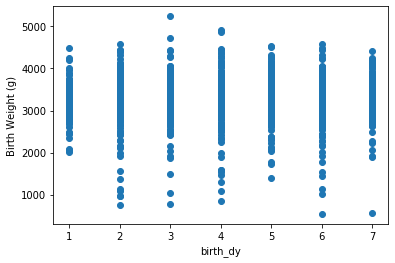

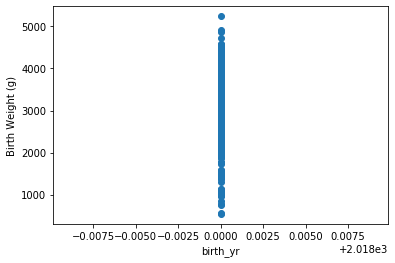

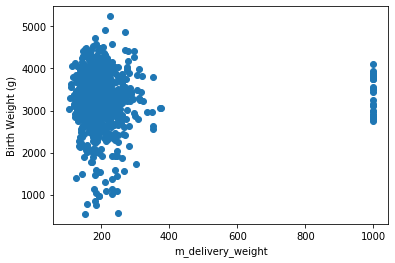

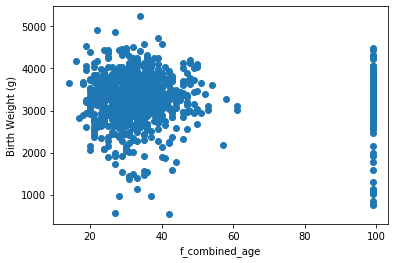

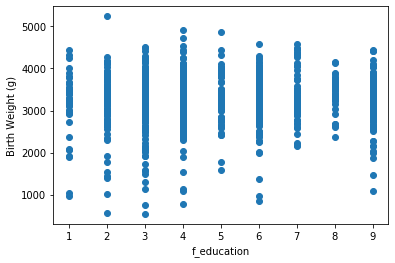

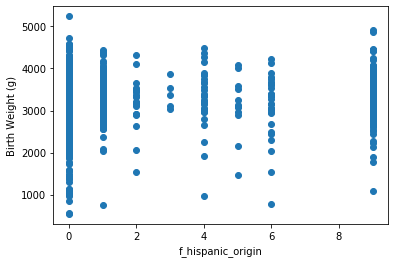

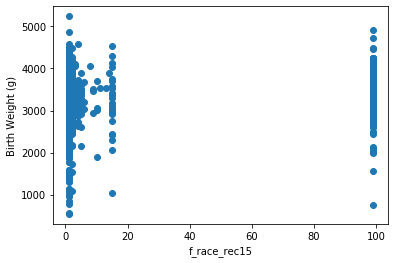

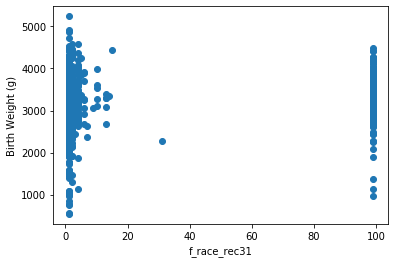

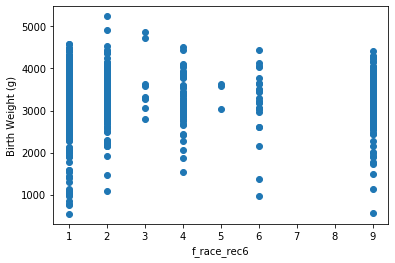

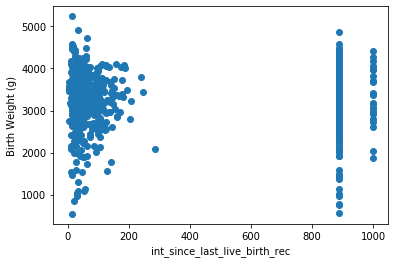

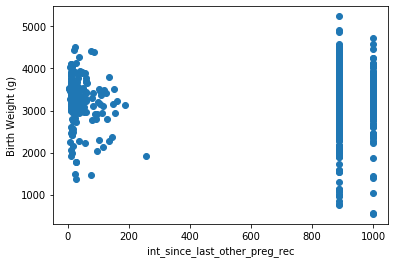

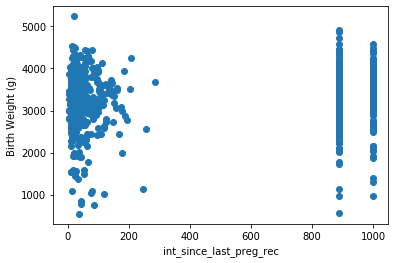

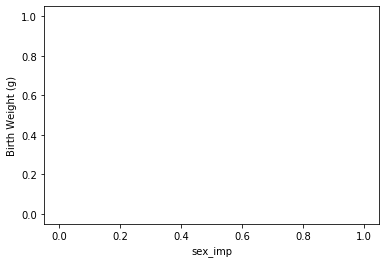

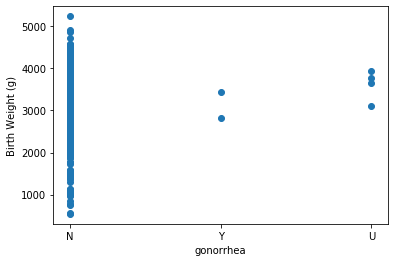

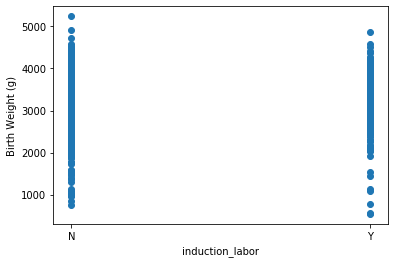

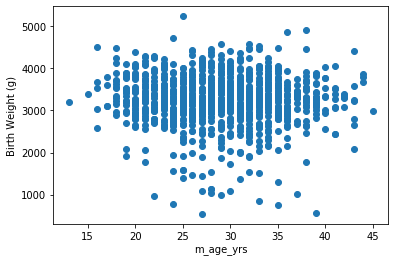

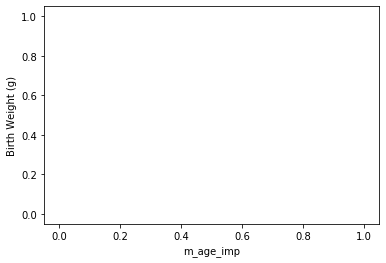

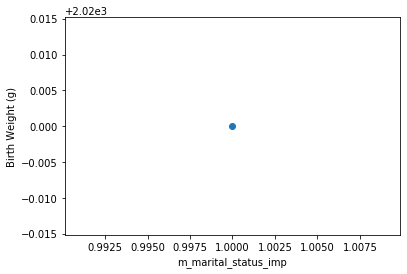

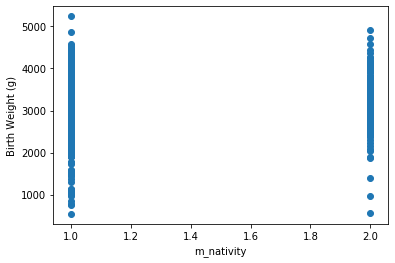

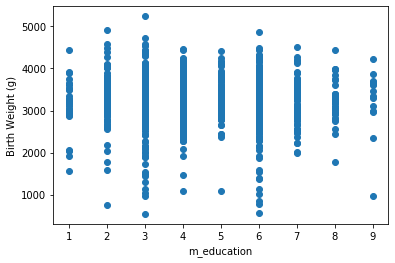

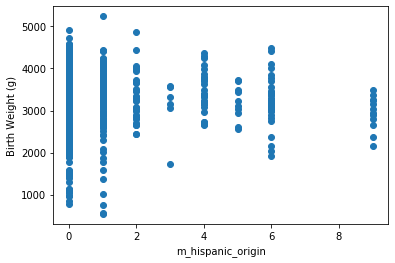

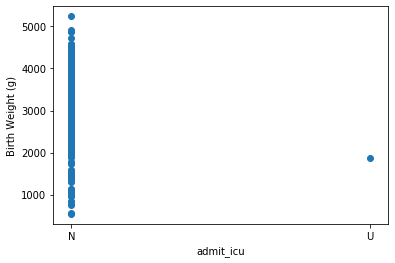

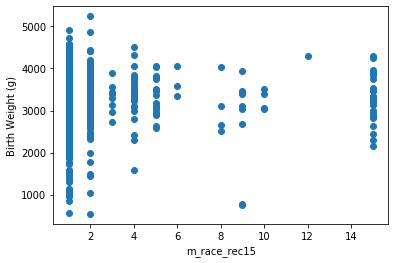

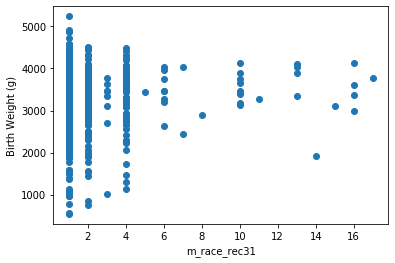

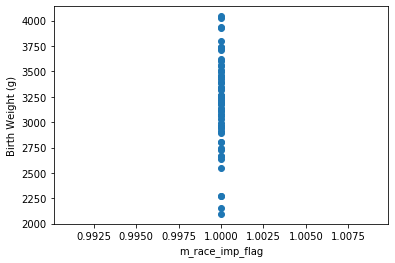

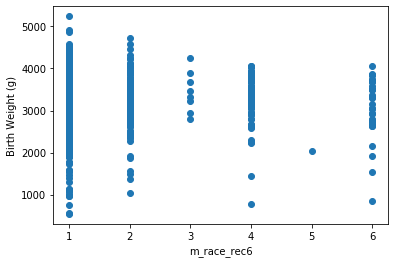

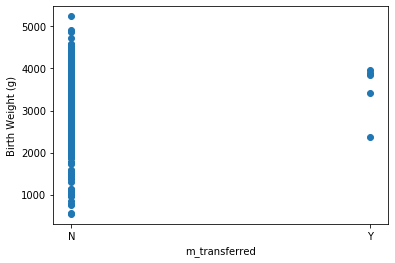

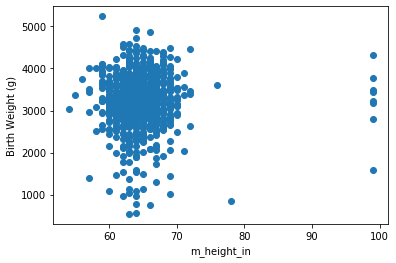

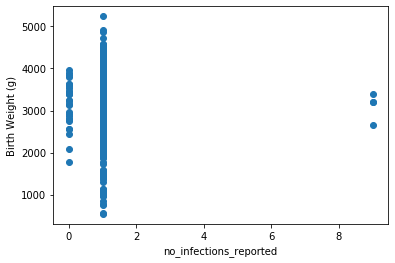

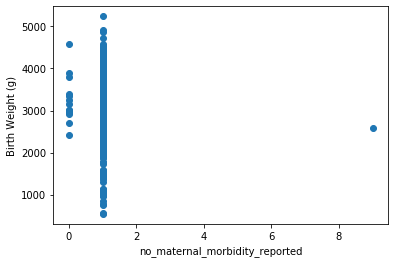

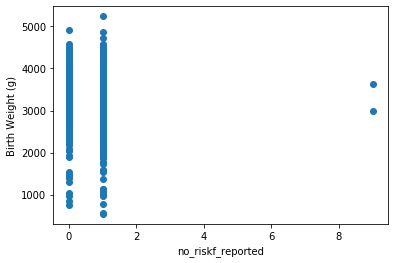

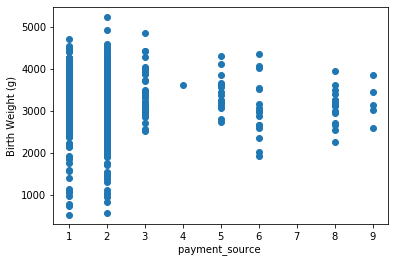

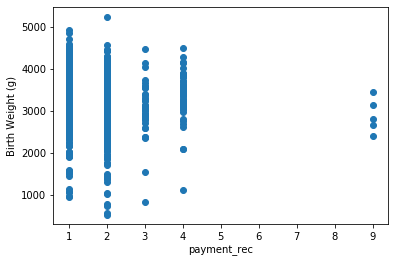

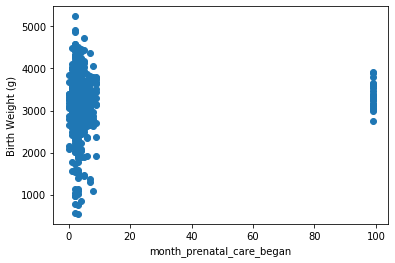

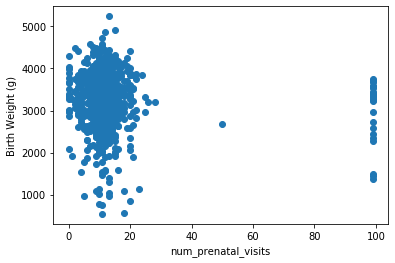

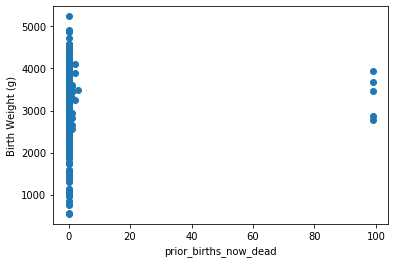

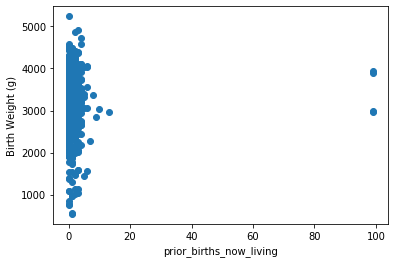

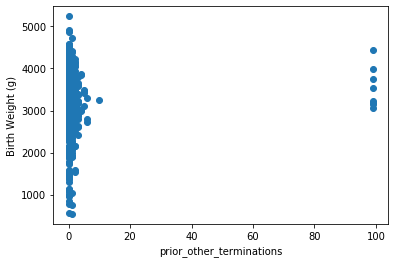

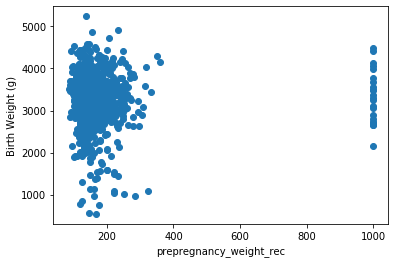

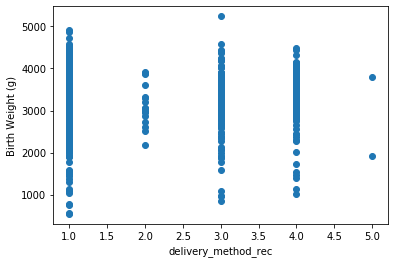

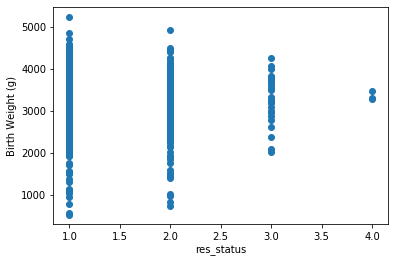

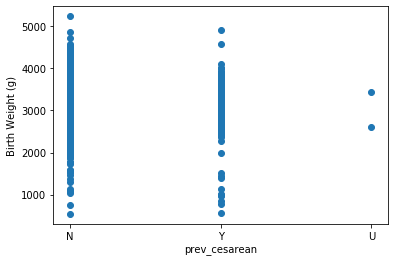

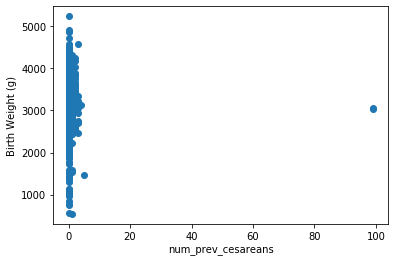

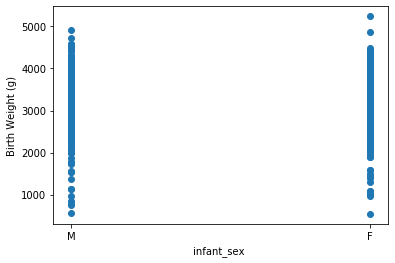

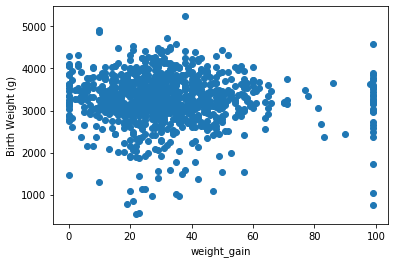

In [145]:
columns = list(df.columns)

for i in columns:
    plt.scatter(df[i], df['birth_weight_g'])
    plt.xlabel(i)
    plt.ylabel("Birth Weight (g)")
    plt.show()

In [ ]:
df['bmi'] = df['bmi'].mask(df['bmi'] == 99.9, np.nan)
df['cigs_before_preg'] = df['cigs_before_preg'].mask(df['cigs_before_preg'] == 99, np.nan)
df['last_norm_menses_yr'] = df['last_norm_menses_yr'].mask(df['last_norm_menses_yr'] == 9999, np.nan)
df['m_deliveryweight'] = df['m_deliveryweight'].mask(df['m_deliveryweight'] == 999, np.nan)
df['f_combined_age'] = df['f_combined_age'].mask(df['f_combined_age'] == 99, np.nan)
df['f_education'] = df['f_education'].mask(df['f_education'] == 9, np.nan)
df['f_hispanic_origin'] = df['f_hispanic_origin'].mask(df['f_hispanic_origin'] == 9, np.nan)
df['f_race_r15'] = df['f_race_r15'].mask(df['f_race_r15'] == 99, np.nan)
df['f_race_r31'] = df['f_race_r31'].mask(df['f_race_r31'] == 99, np.nan)
df['f_race_r6'] = df['f_race_r6'].mask(df['f_race_r6'] == 9, np.nan)
df['last_live_birth_mn'] = df['last_live_birth_mn'].mask(df['last_live_birth_mn'] == 999, np.nan)
df['last_live_birth_mn'] = df['last_live_birth_mn'].mask(df['last_live_birth_mn'] == 888, np.nan)
df['last_preg_mn'] = df['last_preg_mn'].mask(df['last_preg_mn'] == 999, np.nan)
df['last_preg_mn'] = df['last_preg_mn'].mask(df['last_preg_mn'] == 888, np.nan)
df['gonorrhea'] = df['gonorrhea'].mask(df['gonorrhea'] == 'U', np.nan)
df['m_education'] = df['m_education'].mask(df['m_education'] == 9, np.nan)
df['m_hispanic_origin'] = df['m_hispanic_origin'].mask(df['m_hispanic_origin'] == 9, np.nan)
df['admit_icu'] = df['admit_icu'].mask(df['admit_icu'] == 'U', np.nan)
df['m_transferred'] = df['m_transferred'].mask(df['m_transferred'] == 'U', np.nan)
df['m_height_in'] = df['m_height_in'].mask(df['m_height_in'] == 99, np.nan)
df['no_infec_reported'] = df['no_infec_reported'].mask(df['no_infec_reported'] == 9, np.nan)